In [217]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [218]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


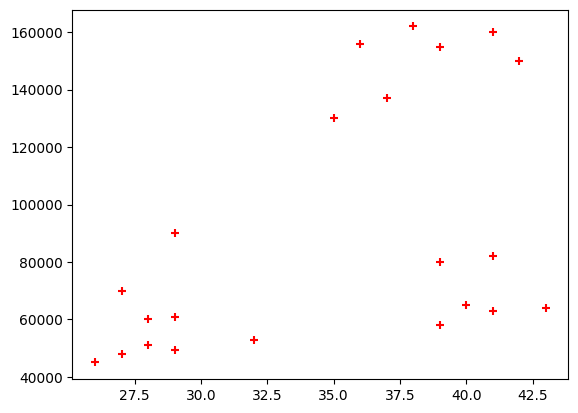

In [219]:
plt.scatter(df['Age'],df['Income($)'],marker="+",color="red")

In [220]:

k = KMeans(n_clusters=3)


In [221]:
y_predicted=k.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [225]:
df['cluster1'] =y_predicted
df.head()

,Name,Age,Income($),cluster1
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [227]:
k.cluster_centers_

array([[3.24166667e+01, 5.72916667e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.63333333e+01, 8.40000000e+04]])

In [223]:
df1= df[df.cluster1 ==0]
df2= df[df.cluster1 ==1]
df3= df[df.cluster1 ==2]

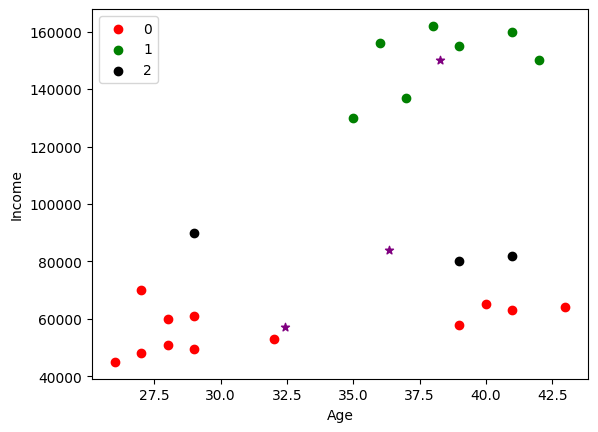

In [228]:
plt.scatter(df1.Age,df1['Income($)'],color="red")
plt.scatter(df2.Age,df2['Income($)'],color="green")
plt.scatter(df3.Age,df3['Income($)'],color="black")
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(['0','1','2'])

In [229]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
scaler.fit(df[['Age']])
df.Age = scaler.fit_transform(df[['Age']])

In [230]:
df.head()

,Name,Age,Income($),cluster1
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


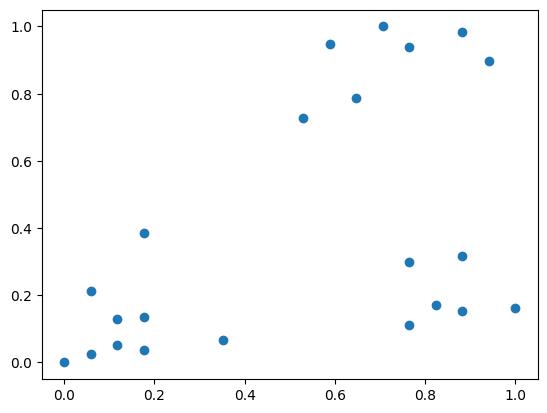

In [231]:
plt.scatter(df.Age,df['Income($)'])

In [232]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [233]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster1,cluster
0,Rob,0.058824,0.213675,0,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,0


In [234]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

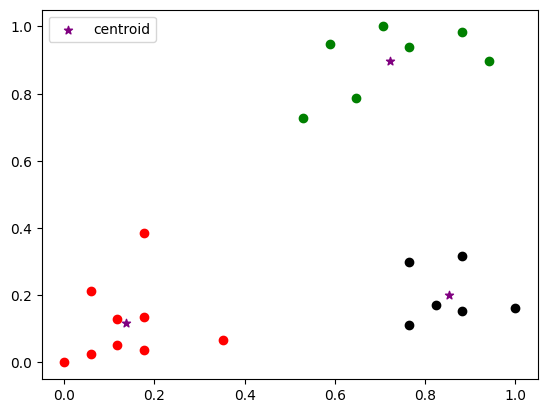

In [235]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [236]:
sse=[]
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [237]:
sse

[5.434011511988178,
 2.3456144914725936,
 0.4750783498553096,
 0.34910470944195654,
 0.332842483556213,
 0.23022348815682742,
 0.17299621932455467,
 0.17687453294948938,
 0.12618389852922432]

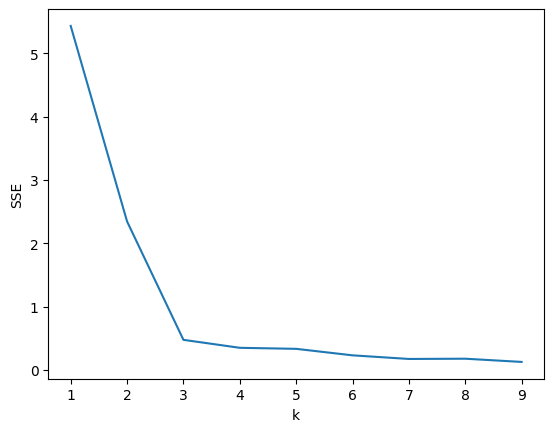

In [238]:
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(k_rng,sse)